# 정기권,일일권 이용거리-시간 분포비교

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 로드

In [2]:
with open('./dataset/따릉이_대여이력_2019v2.pkl','rb') as f:
    df2019=pickle.load(f)
    
with open('./dataset/따릉이_대여이력_2020v2.pkl','rb') as f:
    df2020=pickle.load(f)

In [3]:
print('2019년 데이터셋 : ',df2019.shape)
print('2020년 데이터셋 : ',df2020.shape)

2019년 데이터셋 :  (18971319, 9)
2020년 데이터셋 :  (23555090, 9)


In [4]:
fare_list_19=sorted(df2019['fare'].unique())
fare_list_19

['BIL_001',
 'BIL_002',
 'BIL_004',
 'BIL_005',
 'BIL_006',
 'BIL_007',
 'BIL_008',
 'BIL_011',
 'BIL_012',
 'BIL_014',
 'BIL_015',
 'BIL_016',
 'BIL_017',
 'BIL_020']

In [5]:
fare_list_20=sorted(df2020['fare'].unique())
fare_list_20

['BIL_001',
 'BIL_002',
 'BIL_004',
 'BIL_005',
 'BIL_006',
 'BIL_007',
 'BIL_008',
 'BIL_011',
 'BIL_012',
 'BIL_014',
 'BIL_015',
 'BIL_016',
 'BIL_017',
 'BIL_020',
 'BIL_021']

In [6]:
fares={'BIL_001':'7(1H)',
      'BIL_002':'30(1H)',
      'BIL_004':'180(1H)',
      'BIL_005':'365(1H)',
      'BIL_011':'7(2H)',
      'BIL_012':'30(2H)',
      'BIL_014':'180(2H)',
      'BIL_015':'365(2H)',
      'BIL_006':'mem(1H)',
      'BIL_007':'nonmem(1H)',
      'BIL_016':'mem(2H)',
      'BIL_017':'nonmem(2H)',
      'BIL_008':'OTHER',
      'BIL_020':'OTHER',
      'BIL_021':'OTHER'}

In [7]:
df2019['fare2']=df2019['fare'].map(fares)
df2020['fare2']=df2020['fare'].map(fares)

In [8]:
df2019.head()

,rent_id,rent_time,return_id,return_time,travel_time,travel_distance,fare,sex,age,fare2
0,1421,2019-01-01 00:00:44,1420,2019-01-01 00:03:53,189.0,580.0,BIL_004,\N,AGE_002,180(1H)
1,1408,2019-01-01 00:02:16,1433,2019-01-01 00:07:07,291.0,1020.0,BIL_002,F,AGE_005,30(1H)
2,347,2019-01-01 00:04:12,387,2019-01-01 00:07:07,175.0,550.0,BIL_014,M,AGE_003,180(2H)
3,615,2019-01-01 00:03:09,612,2019-01-01 00:07:27,258.0,700.0,BIL_002,\N,AGE_002,30(1H)
4,1177,2019-01-01 00:01:44,1152,2019-01-01 00:08:09,385.0,1090.0,BIL_006,\N,AGE_002,mem(1H)


In [9]:
times={'BIL_001':'1H',
       'BIL_002':'1H',
       'BIL_004':'1H',
       'BIL_005':'1H',
       'BIL_006':'1H',
       'BIL_007':'1H',
       'BIL_008':'OTHER',
       'BIL_020':'OTHER',
       'BIL_021':'OTHER',
       'BIL_011':'2H',
       'BIL_012':'2H',
       'BIL_014':'2H',
       'BIL_015':'2H',
       'BIL_016':'2H',
       'BIL_017':'2H'}

In [10]:
df2019['fare3']=df2019['fare'].map(times)
df2020['fare3']=df2020['fare'].map(times)

In [11]:
short_long={'BIL_001':'Short',
       'BIL_002':'Short',
       'BIL_004':'Long',
       'BIL_005':'Long',
       'BIL_006':'day',
       'BIL_007':'day',
       'BIL_008':'OTHER',
       'BIL_020':'OTHER',
       'BIL_021':'OTHER',
       'BIL_011':'Short',
       'BIL_012':'Short',
       'BIL_014':'Long',
       'BIL_015':'Long',
       'BIL_016':'day',
       'BIL_017':'day'}

df2019['shortLong']=df2019['fare'].map(short_long)
df2020['shortLong']=df2020['fare'].map(short_long)

### 1시간권 -> 1분미만, 4시간 초과인 경우 삭제
### 2시간권 -> 1분미만, 6시간 초과인 경우 삭제

In [12]:
df2019=df2019.drop(df2019[(df2019['travel_time']<60)].index).reset_index(drop=True)

df2020=df2020.drop(df2020[(df2020['travel_time']<60)].index).reset_index(drop=True)

In [13]:
df2019=df2019.drop(df2019[(df2019['fare3']=='1H') & (df2019['travel_time']>14400)].index).reset_index(drop=True)
df2020=df2020.drop(df2020[(df2020['fare3']=='1H') & (df2020['travel_time']>14400)].index).reset_index(drop=True)

In [14]:
df2019=df2019.drop(df2019[(df2019['fare3']=='2H') & (df2019['travel_time']>21600)].index).reset_index(drop=True)
df2020=df2020.drop(df2020[(df2020['fare3']=='2H') & (df2020['travel_time']>21600)].index).reset_index(drop=True)

In [15]:
print('2019년 데이터 ',df2019.shape)
print('2020년 데이터 ',df2020.shape)

2019년 데이터  (18962147, 12)
2020년 데이터  (23540669, 12)


In [16]:
regular=['BIL_001','BIL_002','BIL_004','BIL_005','BIL_011','BIL_012','BIL_014','BIL_015']
daily=['BIL_006','BIL_007','BIL_016','BIL_017']
others=['BIL_008', 'BIL_020','BIL_021']

In [17]:
df2019['type']=df2019['fare'].replace(regular,'Regular').replace(daily,'Daily').replace(others,'Others')
df2020['type']=df2020['fare'].replace(regular,'Regular').replace(daily,'Daily').replace(others,'Others')

In [41]:
regular19=df2019[df2019['type']=='Regular']
daily19=df2019[df2019['type']=='Daily']
others19=df2019[df2019['type']=='Others']

regular20=df2020[df2020['type']=='Regular']
daily20=df2020[df2020['type']=='Daily']
others20=df2020[df2020['type']=='Others']

## 2019-2020 정기권/일일권 이용시간 분포 비교

### 2019-2020년 정기권 이용시간 분포

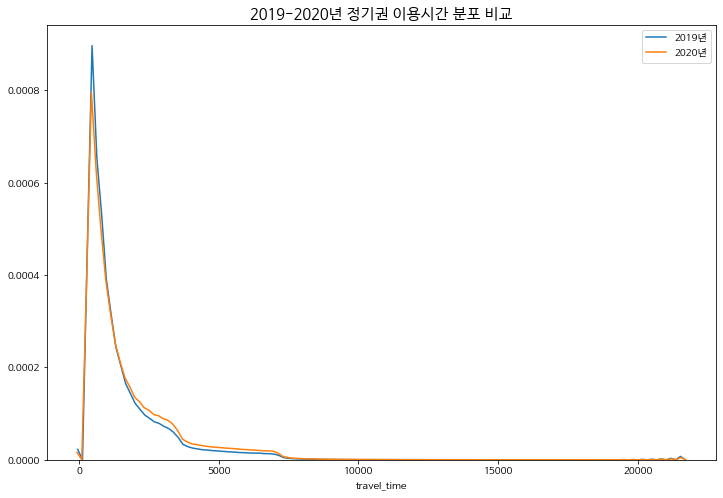

In [20]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(12,8))
sns.distplot(regular19['travel_time'],label='2019년', hist=False)
sns.distplot(regular20['travel_time'],label='2020년', hist=False)
plt.title('2019-2020년 정기권 이용시간 분포 비교',fontsize=15)
plt.legend()
plt.show()

### 2019-2020년 일일권 이용시간 분포

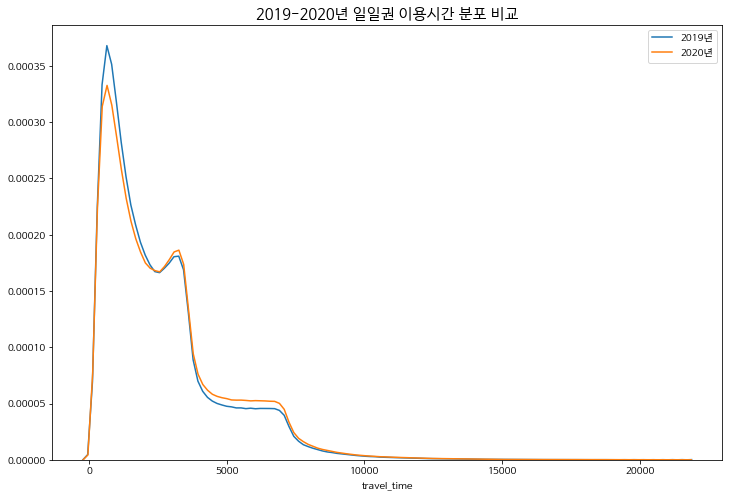

In [21]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(12,8))
sns.distplot(daily19['travel_time'],label='2019년', hist=False)
sns.distplot(daily20['travel_time'],label='2020년', hist=False)
plt.title('2019-2020년 일일권 이용시간 분포 비교',fontsize=15)
plt.legend()
plt.show()

### 2019-2020년 정기권/일일권 이용시간 분포

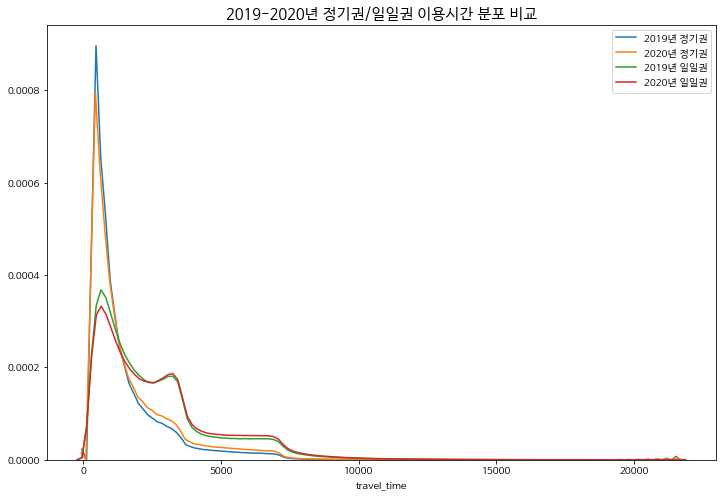

In [22]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(12,8))
sns.distplot(regular19['travel_time'],label='2019년 정기권',hist=False)
sns.distplot(regular20['travel_time'],label='2020년 정기권',hist=False)
sns.distplot(daily19['travel_time'],label='2019년 일일권',hist=False)
sns.distplot(daily20['travel_time'],label='2020년 일일권',hist=False)
plt.title('2019-2020년 정기권/일일권 이용시간 분포 비교',fontsize=15)
plt.legend()
plt.show()

### 정기권 단기 (7,30)

In [24]:
short19=df2019[df2019['shortLong']=='Short']
short20=df2020[df2020['shortLong']=='Short']

long19=df2019[df2019['shortLong']=='Long']
long20=df2020[df2020['shortLong']=='Long']

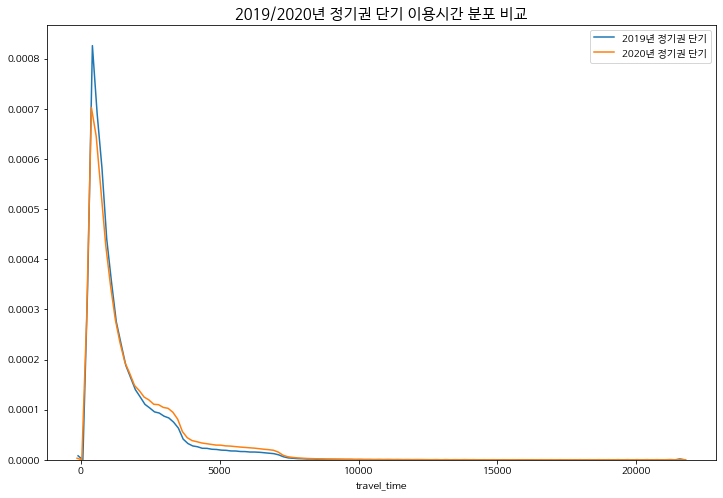

In [25]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(12,8))
sns.distplot(short19['travel_time'],label='2019년 정기권 단기',hist=False)
sns.distplot(short20['travel_time'],label='2020년 정기권 단기',hist=False)
plt.title('2019/2020년 정기권 단기 이용시간 분포 비교',fontsize=15)
plt.legend()
plt.show()

### 정기권 장기 (180,365)

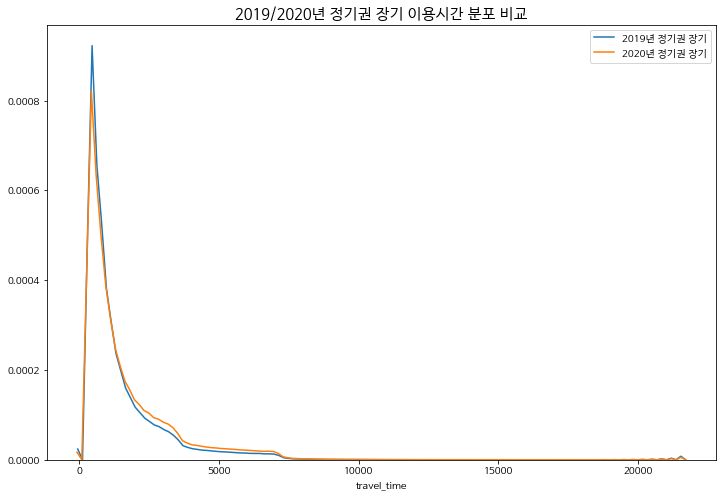

In [26]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(12,8))
sns.distplot(long19['travel_time'],label='2019년 정기권 장기',hist=False)
sns.distplot(long20['travel_time'],label='2020년 정기권 장기',hist=False)
plt.title('2019/2020년 정기권 장기 이용시간 분포 비교',fontsize=15)
plt.legend()
plt.show()

### 2019-2020 정기권 장단기 비교

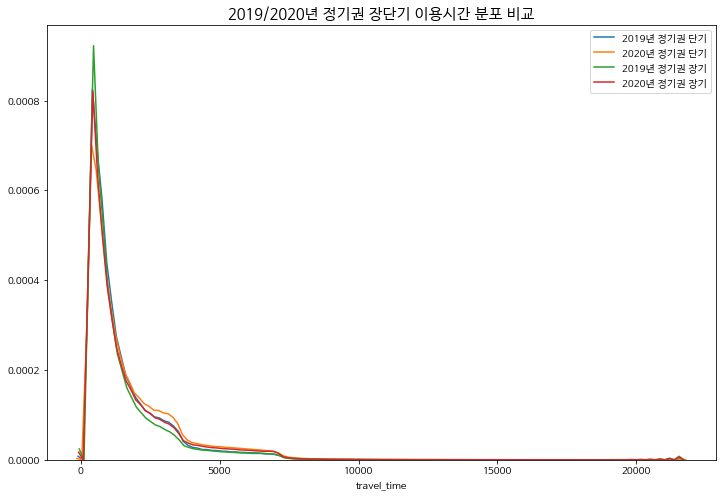

In [27]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(12,8))
sns.distplot(short19['travel_time'],label='2019년 정기권 단기',hist=False)
sns.distplot(short20['travel_time'],label='2020년 정기권 단기',hist=False)
sns.distplot(long19['travel_time'],label='2019년 정기권 장기',hist=False)
sns.distplot(long20['travel_time'],label='2020년 정기권 장기',hist=False)
plt.title('2019/2020년 정기권 장단기 이용시간 분포 비교',fontsize=15)
plt.legend()
plt.show()

## 이용거리 분포 차이 확인

In [28]:
df2019['travel_distance'].describe()

count    1.896215e+07
mean     5.050290e+03
std      1.261116e+04
min      0.000000e+00
25%      1.140000e+03
50%      2.140000e+03
75%      4.530000e+03
max      2.559900e+05
Name: travel_distance, dtype: float64

In [29]:
df2019[df2019['travel_distance']==0].describe()

,travel_time,travel_distance
count,518674.000000,518674.0
mean,1413.992650,0.0
std,1680.905613,0.0
min,60.000000,0.0
25%,403.000000,0.0
50%,788.000000,0.0
75%,1778.000000,0.0
max,134521.000000,0.0


In [32]:
df2019['travel_distance'].quantile(.25)

1140.0

In [33]:
df2019['travel_distance'].quantile(.75)

4530.0

In [39]:
df2019=df2019.drop(df2019[df2019['travel_distance']==0].index).reset_index(drop=True)
df2020=df2020.drop(df2020[df2020['travel_distance']==0].index).reset_index(drop=True)

In [56]:
df2019=df2019.drop(df2019[(df2019['fare3']=='1H') & (df2019['travel_distance']>65200)].index).reset_index(drop=True)
df2020=df2020.drop(df2020[(df2020['fare3']=='1H') & (df2020['travel_distance']>65200)].index).reset_index(drop=True)

df2019=df2019.drop(df2019[(df2019['fare3']=='2H') & (df2019['travel_distance']>97800)].index).reset_index(drop=True)
df2020=df2020.drop(df2020[(df2020['fare3']=='2H') & (df2020['travel_distance']>97800)].index).reset_index(drop=True)

In [57]:
print('2019 : ',df2019.shape)
print('2020 : ',df2020.shape)

2019 :  (18348181, 13)
2020 :  (8056504, 13)


In [58]:
regular19=df2019[df2019['type']=='Regular']
daily19=df2019[df2019['type']=='Daily']
others19=df2019[df2019['type']=='Others']

regular20=df2020[df2020['type']=='Regular']
daily20=df2020[df2020['type']=='Daily']
others20=df2020[df2020['type']=='Others']

In [59]:
short19=df2019[df2019['shortLong']=='Short']
short20=df2020[df2020['shortLong']=='Short']

long19=df2019[df2019['shortLong']=='Long']
long20=df2020[df2020['shortLong']=='Long']

In [60]:
df2019['travel_distance'].describe()

count    1.834818e+07
mean     4.539336e+03
std      7.911376e+03
min      1.000000e+00
25%      1.200000e+03
50%      2.210000e+03
75%      4.590000e+03
max      2.552700e+05
Name: travel_distance, dtype: float64

In [67]:
df2020['travel_distance'].describe()

count    8.056504e+06
mean     5.493449e+03
std      1.725806e+04
min      1.000000e-01
25%      1.305648e+03
50%      2.600000e+03
75%      5.850000e+03
max      1.318598e+07
Name: travel_distance, dtype: float64

In [65]:
df2020['travel_distance'].max()

13185980.89

### 2019-2020 정기권 이용거리 분포 비교

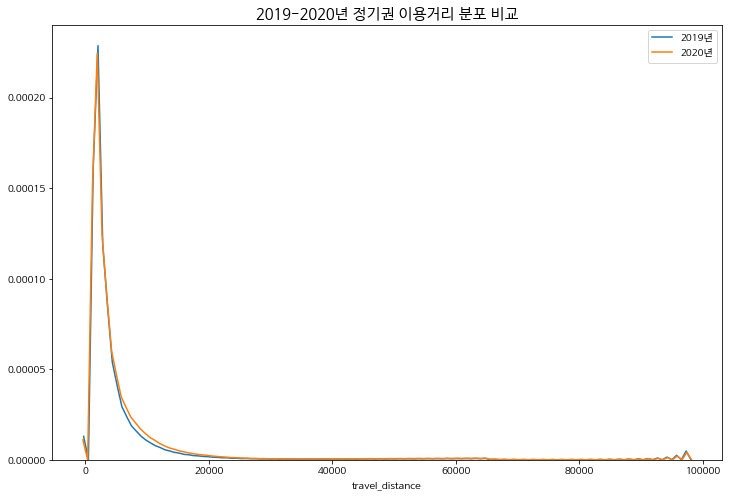

In [68]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(12,8))
sns.distplot(regular19['travel_distance'],label='2019년', hist=False)
sns.distplot(regular20['travel_distance'],label='2020년', hist=False)
plt.title('2019-2020년 정기권 이용거리 분포 비교',fontsize=15)
plt.legend()
plt.show()

### 2019-2020 일일권 이용거리 분포 비교

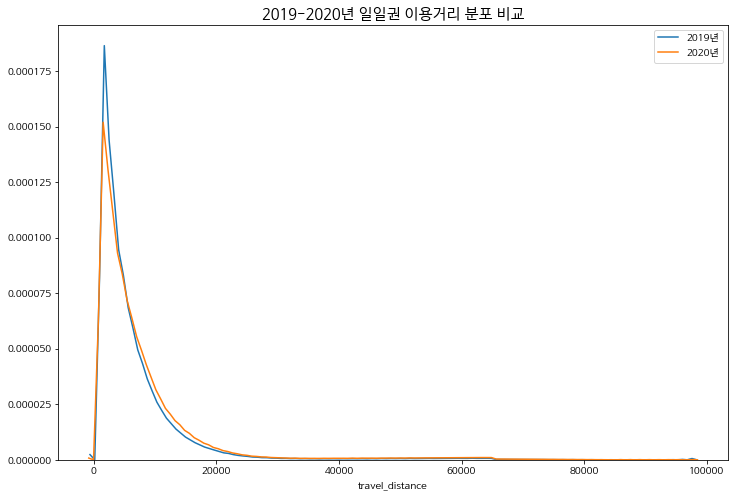

In [69]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(12,8))
sns.distplot(daily19['travel_distance'],label='2019년', hist=False)
sns.distplot(daily20['travel_distance'],label='2020년', hist=False)
plt.title('2019-2020년 일일권 이용거리 분포 비교',fontsize=15)
plt.legend()
plt.show()

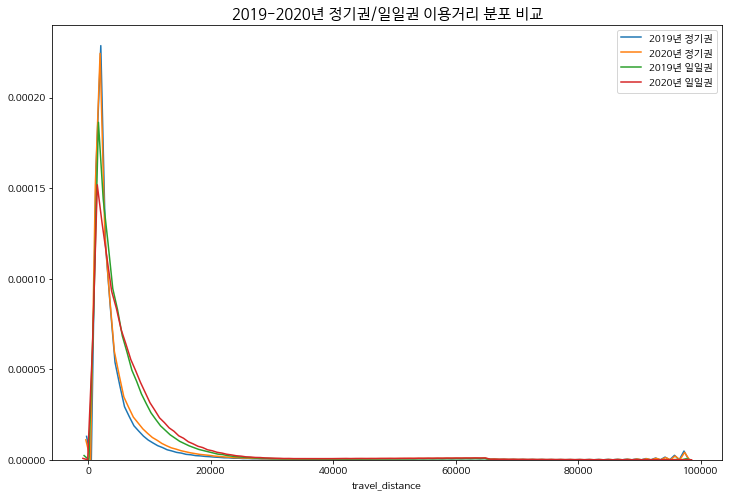

In [70]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(12,8))
sns.distplot(regular19['travel_distance'],label='2019년 정기권', hist=False)
sns.distplot(regular20['travel_distance'],label='2020년 정기권', hist=False)
sns.distplot(daily19['travel_distance'],label='2019년 일일권', hist=False)
sns.distplot(daily20['travel_distance'],label='2020년 일일권', hist=False)
plt.title('2019-2020년 정기권/일일권 이용거리 분포 비교',fontsize=15)
plt.legend()
plt.show()

### 정기권 단기 이용거리 분포 비교

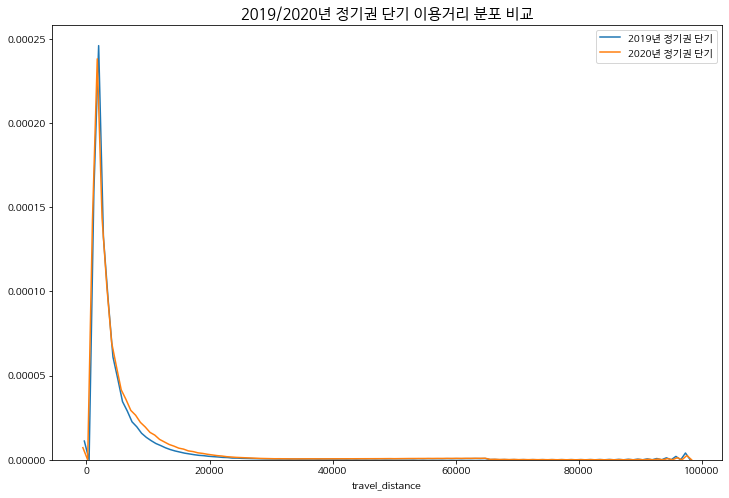

In [71]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(12,8))
sns.distplot(short19['travel_distance'],label='2019년 정기권 단기',hist=False)
sns.distplot(short20['travel_distance'],label='2020년 정기권 단기',hist=False)
plt.title('2019/2020년 정기권 단기 이용거리 분포 비교',fontsize=15)
plt.legend()
plt.show()

### 정기권 장기 이용거리 분포 비교

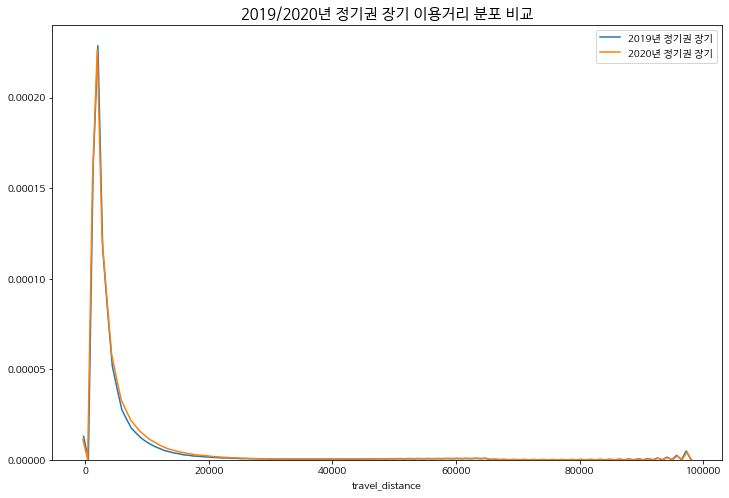

In [72]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(12,8))
sns.distplot(long19['travel_distance'],label='2019년 정기권 장기',hist=False)
sns.distplot(long20['travel_distance'],label='2020년 정기권 장기',hist=False)
plt.title('2019/2020년 정기권 장기 이용거리 분포 비교',fontsize=15)
plt.legend()
plt.show()

### 정기권 장단기 이용거리 분포 비교

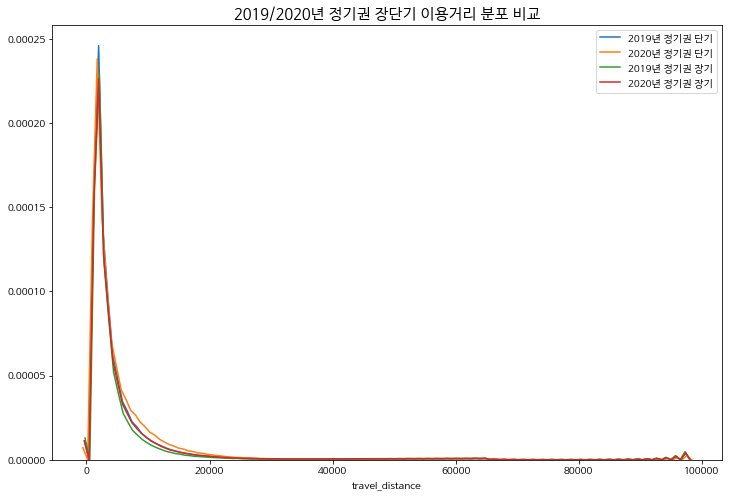

In [73]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(12,8))
sns.distplot(short19['travel_distance'],label='2019년 정기권 단기',hist=False)
sns.distplot(short20['travel_distance'],label='2020년 정기권 단기',hist=False)
sns.distplot(long19['travel_distance'],label='2019년 정기권 장기',hist=False)
sns.distplot(long20['travel_distance'],label='2020년 정기권 장기',hist=False)
plt.title('2019/2020년 정기권 장단기 이용거리 분포 비교',fontsize=15)
plt.legend()
plt.show()

### 이용시간과 거리 상관관계

In [77]:
print('2019년 따릉이 데이터 이용시간과 거리 상관관계')
df2019[['travel_time','travel_distance']].corr()

2019년 따릉이 데이터 이용시간과 거리 상관관계


,travel_time,travel_distance
travel_time,1.000000,0.370853
travel_distance,0.370853,1.000000


In [78]:
print('2020년 따릉이 데이터 이용시간과 거리 상관관계')
df2020[['travel_time','travel_distance']].corr()

2020년 따릉이 데이터 이용시간과 거리 상관관계


,travel_time,travel_distance
travel_time,1.000000,0.204621
travel_distance,0.204621,1.000000
